In [ ]:
!wget https://raw.githubusercontent.com/IIC2115/Syllabus/main/Talleres/T4b/quakes.csv

--2021-11-11 18:38:14--  https://raw.githubusercontent.com/IIC2115/Syllabus/main/Talleres/T4b/quakes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27919 (27K) [text/plain]
Saving to: ‘quakes.csv’

quakes.csv          100%[===================>]  27.26K  --.-KB/s    in 0.002s  

2021-11-11 18:38:15 (12.2 MB/s) - ‘quakes.csv’ saved [27919/27919]



In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
quakes = pd.read_csv("quakes.csv")
quakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1000 non-null   int64  
 1   Lat       999 non-null    float64
 2   Long      995 non-null    float64
 3   Depth     996 non-null    float64
 4   Mag       996 non-null    float64
 5   Stations  987 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


In [ ]:
quakes.head()

,ID,Lat,Long,Depth,Mag,Stations
0,1,-20.42,181.62,562.0,4.8,41.0
1,2,-20.62,181.03,650.0,4.2,15.0
2,3,-26.00,184.10,42.0,5.4,43.0
3,4,-17.97,181.66,626.0,4.1,19.0
4,5,-20.42,181.96,649.0,4.0,11.0


In [ ]:
features = ["Lat", "Long", "Depth", "Stations"]
target = "Mag"

In [ ]:
quakes_no_nan = quakes.dropna()

In [ ]:
train, test = train_test_split(quakes_no_nan, test_size=0.3)
x_train, y_train = train[features], train[target]
x_test, y_test = test[features], test[target]

In [ ]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train

array([[ 0.34294754,  0.48477001,  0.77954496, -0.64311691],
       [-0.51920562,  0.10807771,  0.98020613, -0.55352347],
       [-0.24425928,  0.13692352,  1.38152846, -0.31460762],
       ...,
       [-0.3404905 , -1.13398877, -1.19440094,  0.99942955],
       [-2.22583683,  0.05208291,  0.44822071, -0.55352347],
       [-0.48778318,  0.74777589, -0.68108168,  0.37227545]])

In [ ]:
from sklearn import metrics

def training_and_eval(model, x_train, y_train, x_test, y_test, transform=None):
    model.fit(x_train, y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    if transform is not None:
        train_pred = transform(train_pred)
        test_pred = transform(test_pred)

    train_mse = metrics.mean_squared_error(y_train, train_pred)
    test_mse = metrics.mean_squared_error(y_test, test_pred)
    print(f"Train MSE: {train_mse:.2f}\nTest MSE: {test_mse:.2f}")

# Misión 1

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
training_and_eval(lr_model, x_train, y_train, x_test, y_test)

Train MSE: 155.58
Test MSE: 123.50


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
training_and_eval(dtr_model, x_train, y_train, x_test, y_test)

Train MSE: 0.00
Test MSE: 309.10


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()
training_and_eval(rfr_model, x_train, y_train, x_test, y_test)

Train MSE: 24.48
Test MSE: 150.76


In [ ]:
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor()
training_and_eval(nn_model, x_train, y_train, x_test, y_test)

Train MSE: 152.98
Test MSE: 124.07


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
quakes_to_fill = quakes.dropna(subset=features)
quakes_to_fill = quakes_to_fill[quakes_to_fill["Mag"].isna()]
quakes_to_fill

,ID,Lat,Long,Depth,Mag,Stations
834,835,-19.40,182.29,326.0,NaN,15.0
862,863,-17.93,181.89,567.0,NaN,27.0
912,913,-15.28,185.98,162.0,NaN,36.0
957,958,-20.88,184.95,82.0,NaN,50.0


In [ ]:
x_to_fill = scaler.transform(quakes_to_fill[features])

In [ ]:
lr_model.predict(x_to_fill)

array([6.23330811, 5.66401183, 4.72404621, 6.17979082])

# Misión 2

In [ ]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
training_and_eval(lr_model, x_train, y_train_log, x_test, y_test_log, transform=np.exp)

Train MSE: 12.54
Test MSE: 12.57


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
training_and_eval(dtr_model, x_train, y_train_log, x_test, y_test_log, transform=np.exp)

Train MSE: 174.41
Test MSE: 183.51


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()
training_and_eval(rfr_model, x_train, y_train_log, x_test, y_test_log, transform=np.exp)

Train MSE: 33.62
Test MSE: 21.49


In [ ]:
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor()
training_and_eval(nn_model, x_train, y_train_log, x_test, y_test_log, transform=np.exp)

Train MSE: 12.69
Test MSE: 12.69


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
np.exp(lr_model.predict(x_to_fill))

array([4.80017703, 4.66168504, 4.61459619, 5.0172072 ])



1.   El rendimiento medido en MSE baja considerablemente con respecto a la misión anterior lo que nos indica que la presencia de outliers estaba afectando mucho al modelo.
2.   La transformación logaritmica reduce la escala de la variable y hace que los datos se compriman.
3.   Puede ser util para acercar outliers al resto de los datos.



# Mision 3

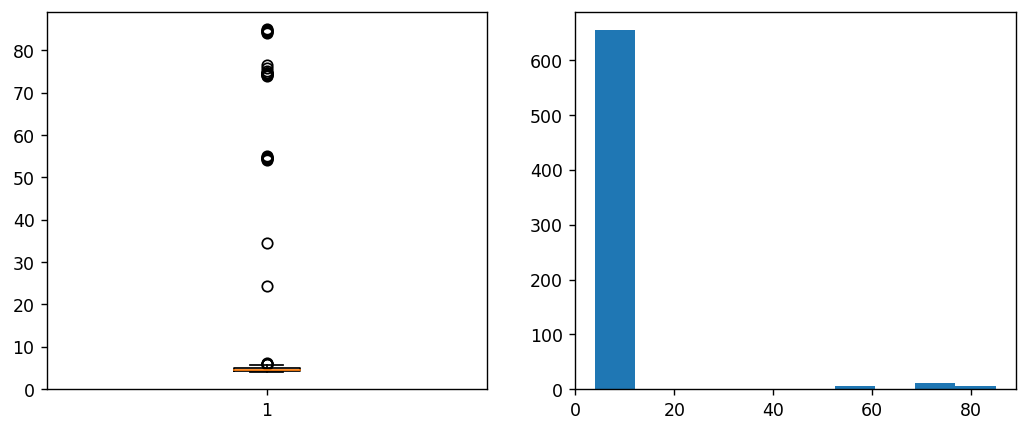

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, dpi=125, figsize=(10, 4))

axes[0].boxplot(y_train)
axes[1].hist(y_train)

plt.show()

In [ ]:
train_mask = y_train < 20
test_mask = y_test < 20

x_train_no_outlier = x_train[train_mask]
y_train_no_outlier = y_train[train_mask]

x_test_no_outlier = x_test[test_mask]
y_test_no_outlier = y_test[test_mask]

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
training_and_eval(lr_model, x_train_no_outlier, y_train_no_outlier, x_test_no_outlier, y_test_no_outlier)

Train MSE: 0.11
Test MSE: 0.10


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
training_and_eval(dtr_model, x_train_no_outlier, y_train_no_outlier, x_test_no_outlier, y_test_no_outlier)

Train MSE: 0.00
Test MSE: 0.07


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()
training_and_eval(rfr_model, x_train_no_outlier, y_train_no_outlier, x_test_no_outlier, y_test_no_outlier)

Train MSE: 0.01
Test MSE: 0.04


In [ ]:
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor()
training_and_eval(nn_model, x_train_no_outlier, y_train_no_outlier, x_test_no_outlier, y_test_no_outlier)

Train MSE: 0.13
Test MSE: 0.12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
lr_model.predict(x_to_fill)

array([4.43268052, 4.39830579, 4.54969848, 4.73748372])



1.   El rendimiento disminuye aun más que en la misión 2 lo que reafirma que la presencia de outliers perjudica a los modelos.
2.   A diferencia de la transformación logistica, en este caso estamos descartando los datos mientras que en la transformacion los mantenemos.



# Misión 4

In [ ]:
for depth in range(1, 11):
    print("Depth", depth)
    dtr_model = DecisionTreeRegressor(max_depth=depth)
    training_and_eval(dtr_model, x_train_no_outlier, y_train_no_outlier, x_test_no_outlier, y_test_no_outlier)
    print()

Depth 1
Train MSE: 0.09
Test MSE: 0.08

Depth 2
Train MSE: 0.07
Test MSE: 0.07

Depth 3
Train MSE: 0.05
Test MSE: 0.05

Depth 4
Train MSE: 0.04
Test MSE: 0.05

Depth 5
Train MSE: 0.03
Test MSE: 0.05

Depth 6
Train MSE: 0.03
Test MSE: 0.04

Depth 7
Train MSE: 0.02
Test MSE: 0.05

Depth 8
Train MSE: 0.01
Test MSE: 0.05

Depth 9
Train MSE: 0.01
Test MSE: 0.06

Depth 10
Train MSE: 0.01
Test MSE: 0.06



Como era de esperarse a medida que aumenta la profundidad del árbol, el modelo *overfitea* a set de entrenamiento. El mejor MSE es con profunidad igual a 1 y de hecho le gana a la regresión logística que encontramos antes.